<img src='./img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="./00_index.ipynb"><< Index </a><br>
<a href="./05_sentinel3_NRT_SLSTR_AOD_load_browse.ipynb"><< 05 - Sentinel-3 Near-Real-Time SLSTR AOD - Load and browse </a><span style="float:right;"><a href="./07_AC_SAF_GOME-2_L3_AAI_load_browse.ipynb">07 - AC SAF GOME-2 Level 3 Absorbing Aerosol Index - Load and browse >></a></span>

<br>

<div class="alert alert-block alert-warning">
<b>LOAD, BROWSE AND VISUALIZE</b></div>

# IASI - Level 2 - Total Column Carbon Monoxide data

## Example Australian fires in December 2019

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/website/home/Satellites/CurrentSatellites/Metop/MetopDesign/IASI/index.html) is an instrument onboard the Metop-A/B satellites. IASI provides information to atmospheric composition data, including `Carbon Monoxide`, `Ozone`, `Sulphur Dioxide`, `Ammonia` and others.

The example below shows you how you can use IASI Level 2 `Carbon Monoxide` data to monitor fire occurences during the Australian fire event in December 2019. Carbon monoxide (CO), which is produced by combustion, stays in the atmosphere for weeks, which makes it easier to track.


<br>

### Outline

* [1 - Load and browse IASI Level 2 products](#load)
* [2 - Load data into a xarray data structure](#load_xr)
* [3 - Load quality flag information](#load_qf)
* [4 - Mask the Total Column Carbon Monoxide data](#mask)
* [5 - Convert the Total Column Carbon Monoxide data from mol/m2 to molecules/cm2](#convert)
* [6 - Visualize the Total Column Carbon Monoxide](#visualize)

<hr>

#### Load required libraries

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import ipynb
from skimage import exposure

from netCDF4 import Dataset
import pandas as pd

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Helper functions

In [2]:
from ipynb.fs.full.functions import generate_masked_array, generate_xr_from_1D_vec, visualize_l2


<hr>

<br>

## <a id='load'></a>Load and browse IASI Level 2 products

IASI Level 2 data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format. You can use the Python library [xarray](http://xarray.pydata.org/en/stable/index.html) to access and manipulate datasets in `netCDF` format.

The following examples shows an example of `Total Column Carbon Monoxide (CO)`.

### Load netCDF data with `xarray`

`xarray`'s function `open_dataset` enables you to open a `netCDF` file. Once loaded, you can inspect the data structure.

You see, that the data is a 3-dimensional vector with more than 517,000 individual entries for the `time` dimension. `latitude`, `longitude` and other parameters are stored as individual data variables.

In [19]:
iasi_file = xr.open_dataset('../eodata/iasi/co/2b/2019/12/30/IASI_METOPB_L2_CO_20191230_ULB-LATMOS_V6.5.0.nc')
iasi_file


<xarray.Dataset>
Dimensions:                            (nlayers: 19, npressures: 20, time: 517716)
Coordinates:
  * time                               (time) float64 4.101e+08 ... 4.101e+08
Dimensions without coordinates: nlayers, npressures
Data variables:
    time_string                        (time) |S16 ...
    time_in_day                        (time) float64 ...
    latitude                           (time) float32 ...
    longitude                          (time) float32 ...
    solar_zenith_angle                 (time) float32 ...
    satellite_zenith_angle             (time) float32 ...
    orbit_number                       (time) int64 ...
    scanline_number                    (time) int32 ...
    pixel_number                       (time) int32 ...
    ifov_number                        (time) int32 ...
    retrieval_quality_flag             (time) int32 ...
    surface_altitude                   (time) float32 ...
    CO_apriori_partial_column_profile  (time, nlayers) float32 ...
    CO_partial_column_profile          (time, nlayers) float32 ...
    CO_partial_column_error            (time, nlayers) float32 ...
    CO_total_column                    (time) float32 ...
    CO_total_column_error              (time) float32 ...
    CO_degrees_of_freedom              (time) float32 ...
    air_partial_column_profile         (time, nlayers) float32 ...
    atmosphere_pressure_grid           (time, npressures) float32 ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 ...
Attributes:
    title:                       IASI/METOPB ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.5.0
    history:                     2020-06-28 23:49:54 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    references:                  Reference to the CO retrieval: FORLI radiati...
    id:                          IASI_METOPB_L2_CO_20191230_ULB-LATMOS_V6.5.0.nc
    tracking_id:                 4c9ae054-b989-11ea-a813-00259058dd14
    geospatial_lat_min:          -90.0
    geospatial_lat_max:          +90.0
    geospatial_latitude_units:   degrees_north
    geospatial_lon_min:          -180.0
    geospatial_lon_max:          +180.0
    geospatial_longitude_units:  degrees_east
    geospatial_vertical_min:     0
    geospatial_vertical_max:     60
    geospatial_vertical_units:   km
    time_coverage_start:         20191201T000000Z
    time_coverage_end:           20191201T235959Z
    conventions:                 CF-1.6
    standard_name_vocabulary:    NetCDF Climate and Forecast (CF) Medata Conv...
    keywords:                    satellite,observation,atmosphere,carbon mono...
    keywords_vocabulary:         GCMD Science Keywords
    platform:                    Metop-B
    sensor:                      IASI
    spatial_resolution:          12km at nadir
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/

<br>

As a next step, you can select the variable `CO_total_column`, which holds total column carbon monoxide data values.

In [20]:
co = iasi_file['CO_total_column']
co

<xarray.DataArray 'CO_total_column' (time: 517716)>
[517716 values with dtype=float32]
Coordinates:
  * time     (time) float64 4.101e+08 4.101e+08 ... 4.101e+08 4.101e+08
Attributes:
    units:                                                  mol m-2
    long_name:                                              retrieved carbon ...
    standard_name:                                          atmosphere_mole_c...
    ancillary_variables:                                    CO_total_column_e...
    multiplication_factor_to_convert_to_molecules_per_cm2:  6.02214086e+19

<br>

## <a id='load_xr'></a>Load data into a xarray structure with the function `generate_xr_from_1D_vec`

With the help of the function [generate_xr_from_1D_vec](./functions.ipynb#generate_xr_from_1D_vec), you can generate a `xarray DataArray` object, with `latitude` and `longitude` values as coordinates and the total column carbon monoxide information as data values. This data structure will be helpful for plotting and masking the data.

You can retrieved the information for variable `long_name`, `unit` and `variable name` from the attributes of the data variable `co`.

In [8]:
iasi_co_da = generate_xr_from_1D_vec(iasi_file, 
                                     'latitude', 'longitude', 
                                     co, 
                                     co.name, co.long_name, 
                                     1, 
                                     co.units)
iasi_co_da

<xarray.DataArray 'CO_total_column' (ground_pixel: 517716)>
array([0.03503745, 0.03140726, 0.02979294, ..., 0.02419499, 0.02706594,
       0.0236241 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 20.535797 20.445396 ... 83.3321 83.592
    longitude  (ground_pixel) float32 -48.1196 -48.471603 ... 139.0327 138.97531
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

## <a id='load_qf'></a>Load quality flag information

The IASI Level data files provide you information on the quality for each data point. This information is useful to generate a quality mask and to mask out data points with a non sufficient quality.

In order to do so, you have to load the quality flag variable `retrieval_quality_flag` from the data file. You see that the pixels with a `quality flag = 2` are the most reliable pixels. Pixels with a `quality flag = 1 or 0` shalled be masked out.

In [9]:
qf = iasi_file['retrieval_quality_flag']
qf

<xarray.DataArray 'retrieval_quality_flag' (time: 517716)>
[517716 values with dtype=int32]
Coordinates:
  * time     (time) float64 4.101e+08 4.101e+08 ... 4.101e+08 4.101e+08
Attributes:
    long_name:  retrieval quality flag summarizing processing flags
    comment:    = 2 for the most reliable pixels; = 1 for the valuable pixels...

<br>

You can re-use the [generate_xr_from_1D_vec](./functions.ipynb#generate_xr_from_1D_vec) function again in order to generate a `xarray DataArray` with the quality flag information.

In [21]:
iasi_co_qf_da = generate_xr_from_1D_vec(iasi_file,
                                        'latitude', 'longitude', 
                                        qf, 
                                        qf.name, qf.long_name, 
                                        1, 
                                        '-')
iasi_co_qf_da

<xarray.DataArray 'retrieval_quality_flag' (ground_pixel: 517716)>
array([2, 1, 2, ..., 1, 1, 2], dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 20.535797 20.445396 ... 83.3321 83.592
    longitude  (ground_pixel) float32 -48.1196 -48.471603 ... 139.0327 138.97531
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieval quality flag summarizing processing flags
    units:      -

<br>

## <a id='mask'></a>Mask the Total Column Carbon Monoxide data

The quality flag information can now be used to mask the `xarray DataArray`. You can make use of the function [generate_masked_array](./functions.ipynb#generate_masked_array), where you can set which pixels shall be kept. All data points with a `quality flag = 2` shall be kept, all others shall be masked out.

You see that the number of data points reduced to just a bit less than 400,000 instead of more than 500,000.

In [22]:
iasi_co_masked = generate_masked_array(iasi_co_da, iasi_co_qf_da, 2, '=')
iasi_co_masked

<xarray.DataArray (ground_pixel: 517716)>
array([0.03503745,        nan, 0.02979294, ...,        nan,        nan,
       0.0236241 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 20.535797 20.445396 ... 83.3321 83.592
    longitude  (ground_pixel) float32 -48.1196 -48.471603 ... 139.0327 138.97531
Dimensions without coordinates: ground_pixel


<xarray.DataArray (ground_pixel: 379062)>
array([0.03503745, 0.02979294, 0.03141417, ..., 0.02792602, 0.02415955,
       0.0236241 ], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 20.535797 20.962402 ... 83.558 83.592
    longitude  (ground_pixel) float32 -48.1196 -45.7707 ... 134.50531 138.97531
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  retrieved carbon monoxide total column in mole/m2
    units:      mol m-2

<br>

## <a id='convert'></a>Convert the Total Column Carbon Monoxide data from mol/m2 to molecules/cm2

The last step before visualizing the total column carbon monoxide information is to convert the data from `mol/m2` to `molecules/cm2`. The loaded data variable `co` has an attribute called `multiplication_factor_to_convert_to_molecules_per_cm2`, which is used to convert the data values.

In [12]:
iasi_co_converted = iasi_co_masked * co.multiplication_factor_to_convert_to_molecules_per_cm2
iasi_co_converted

<xarray.DataArray (ground_pixel: 379062)>
array([2.1100045e+18, 1.7941726e+18, 1.8918053e+18, ..., 1.6817445e+18,
       1.4549220e+18, 1.4226765e+18], dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 20.535797 20.962402 ... 83.558 83.592
    longitude  (ground_pixel) float32 -48.1196 -45.7707 ... 134.50531 138.97531
Dimensions without coordinates: ground_pixel

<br>

## <a id='visualize'></a> Visualize the masked dataset with the function `visualize_l2`

You can visualize the IASI Total Column Carbon Monoxide data with the function [visualize_l2](./ltpy_functions.ipynb#visualize_l2), which uses matplotlib's `scatterplot` function. You can set an `Orthographic()` projection and focus on a region over Australia.

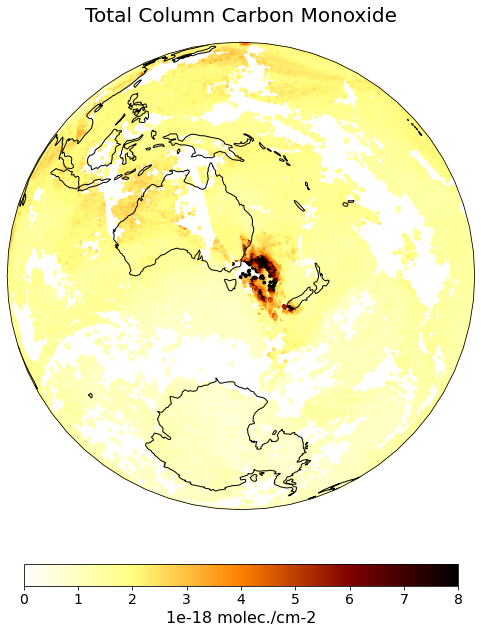

In [23]:
visualize_l2(iasi_co_converted, 
             1e-18,
             ccrs.Orthographic(150,-40), 
             0, 8, 
             8, 
             'afmhot_r', 
             'molec./cm-2', 
             'Total Column Carbon Monoxide')

<br>

<br>

Let us also visualize the same example, but in a `PlateCarree()` projection.

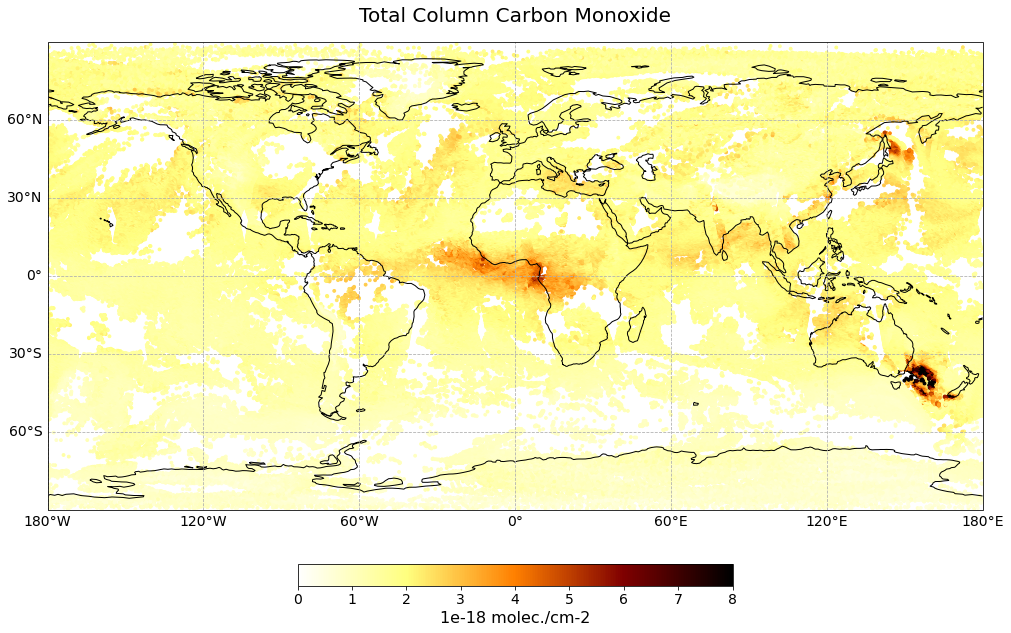

In [24]:
visualize_l2(iasi_co_converted, 
             1e-18,
             ccrs.PlateCarree(), 0, 8, 
             8, 
             'afmhot_r',
             'molec./cm-2',
             'Total Column Carbon Monoxide')

<br>

<a href="./00_index.ipynb"><< Index </a><br>
<a href="./05_sentinel3_NRT_SLSTR_AOD_load_browse.ipynb"><< 05 - Sentinel-3 Near-Real-Time SLSTR AOD - Load and browse </a><span style="float:right;"><a href="./07_AC_SAF_GOME-2_L3_AAI_load_browse.ipynb">07 - AC SAF GOME-2 Level 3 Absorbing Aerosol Index - Load and browse >></a></span>

<hr>

<img src='./img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.